In [1]:
import os 
import numpy as np

from ivim_analysis.read_config import get_config
from ivim_analysis.n_patients import NPatients
from ivim_analysis.load_b_example import load_b

Welcome to ivim_analysis version 1.0.0


# Parameter initialization

In [2]:
from datetime import date
from datetime import datetime
patients_info_file, zhaog_path, pickle_ivim_output_path = get_config('../config/config.json')

# 创建输出目录
# 每小时创建一个目录
is_static = True
if is_static:
    current_time = "static"
else:
    current_time = datetime.now().strftime("%Y-%m-%d_%H")
output_dir = f"../output/{current_time}"
# output_dir = f"../output/{date.today()}"
pickle_ivim_output_path = f"{output_dir}/pickled/ivim"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(pickle_ivim_output_path, exist_ok=True)

n_analysis = NPatients.readPatientsInfo(patients_info_file, zhaog_path)

# of patients:  7


In [3]:
# print info
for n in n_analysis:
    print(n_analysis[n].patient_id, end=' ')
    print(n_analysis[n].nii_path)
    print("\tbvals:\t", n_analysis[n].bvals)
    print("\t3 roi:\t", n_analysis[n].circles)

刘伯林 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/刘伯林_10.nii.gz
	bvals:	 [20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0]
	3 roi:	 [[130, 120, 5], [160, 125, 5], [187, 147, 5]]
刘军 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/刘军_11.nii.gz
	bvals:	 [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
	3 roi:	 [[130, 115, 5], [150, 120, 5], [170, 125, 5]]
孙金鹿 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/孙金鹿_11.nii.gz
	bvals:	 [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
	3 roi:	 [[140, 120, 5], [159, 130, 5], [172, 140, 5]]
张喜凤 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/张喜凤_10.nii.gz
	bvals:	 [20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0]
	3 roi:	 [[125, 110, 5], [137, 112, 5], [155, 126, 5]]
徐家恒 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/徐家恒_11.nii.gz
	bvals:	 [25, 50, 100, 200, 300, 400, 600, 8

# Plot

## Plot pancreas

### Plot with roi

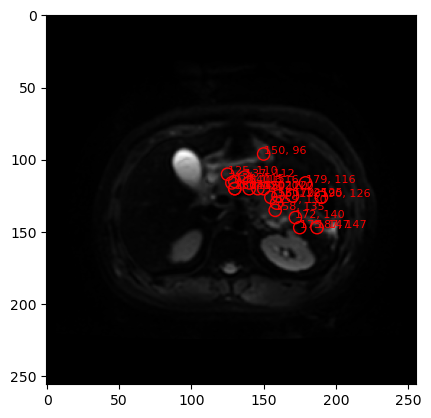

In [4]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
for name, analysis in n_analysis.items():
    analysis.plot_pancreas_slice(ax, plot_roi=True)

Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented


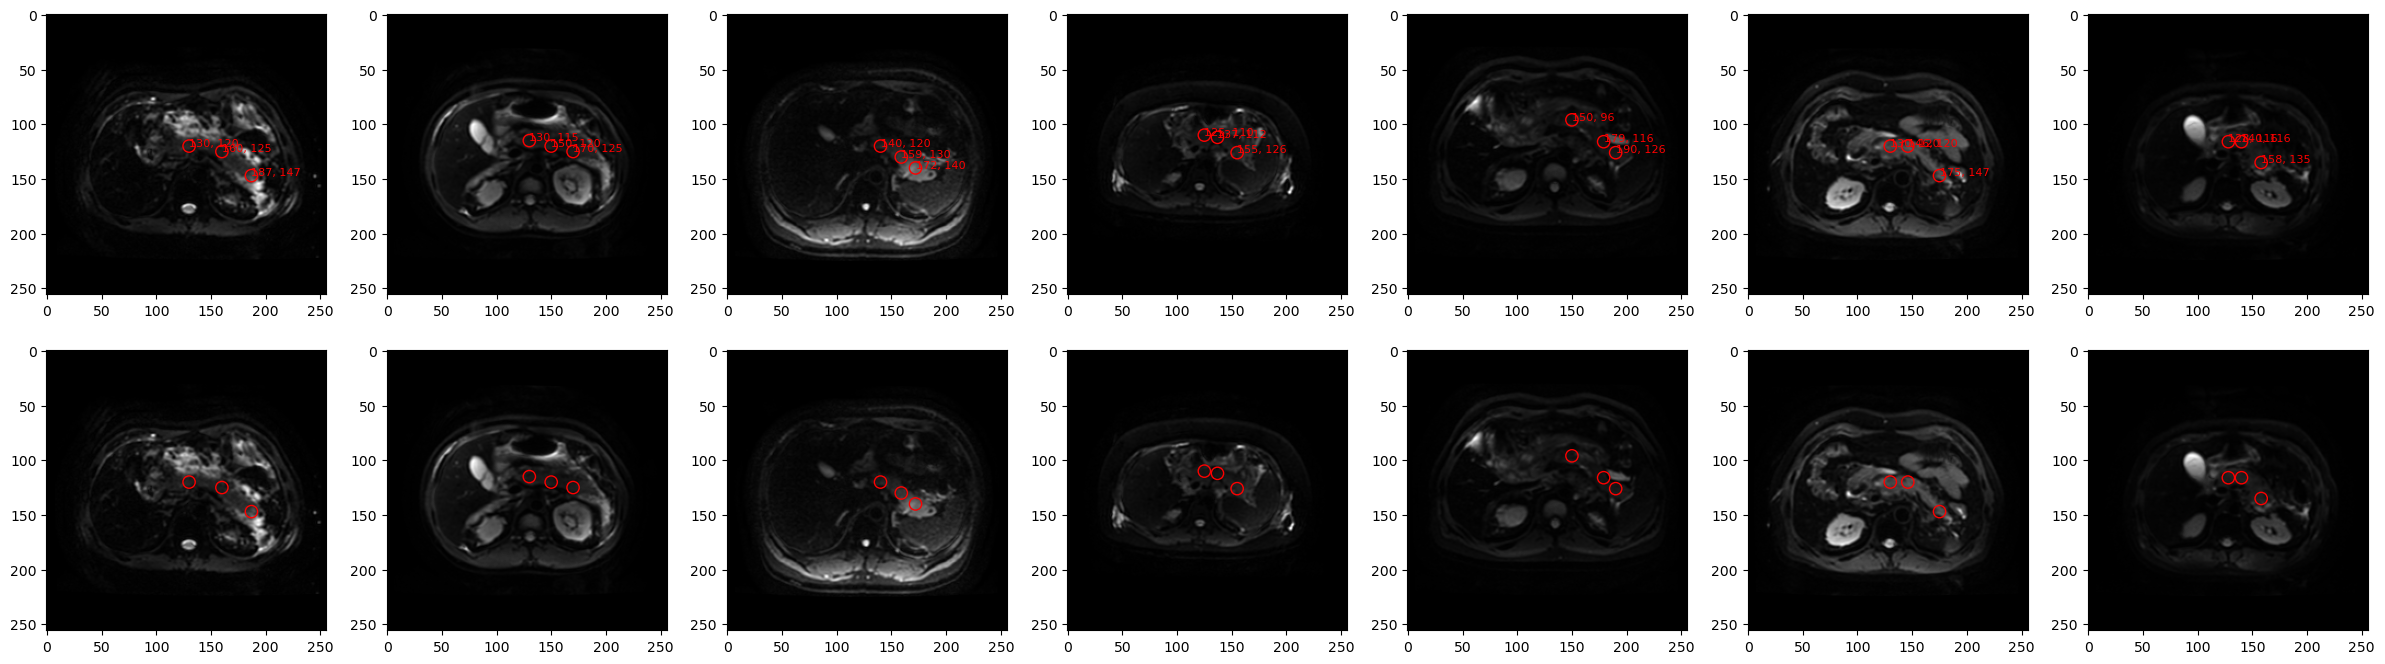

In [5]:
import matplotlib.pyplot as plt

fig_t2, axes_t2 = plt.subplots(2, len(n_analysis), figsize=(30, 8))
for i, n in enumerate(n_analysis):
    n_analysis[n].plot_pancreas_slice(axes_t2[0, i], plot_roi=True, is_title=True)
    n_analysis[n].plot_pancreas_slice(axes_t2[1, i], plot_roi=True, is_text=False)

all_pan_with_roi = f'{output_dir}/pan_with_roi.png'
plt.savefig(all_pan_with_roi)

In [6]:
# TODO
# plt.imshow with jet color map

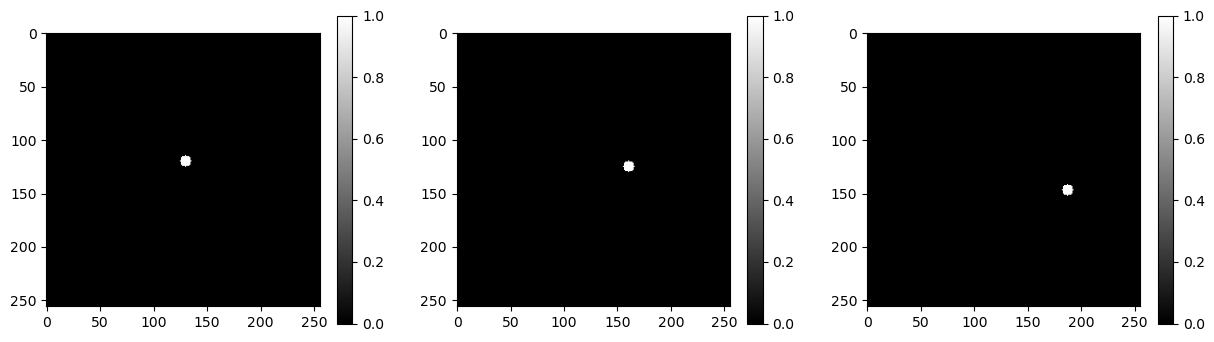

-------------------


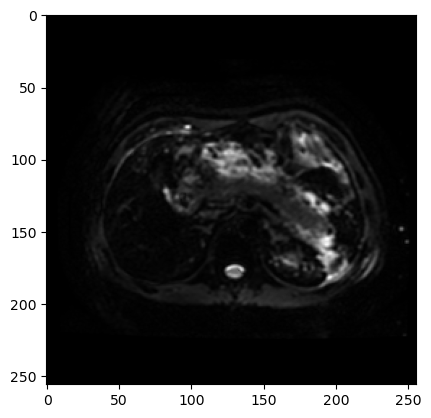

-------------------


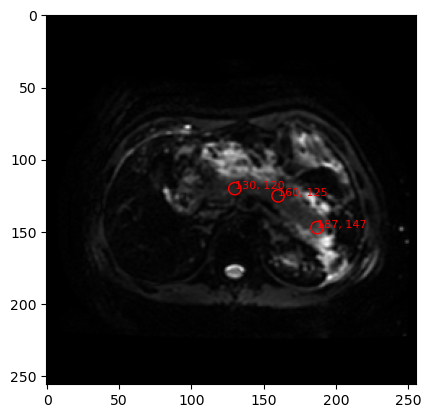

-------------------
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00092286] 6.017820247185039


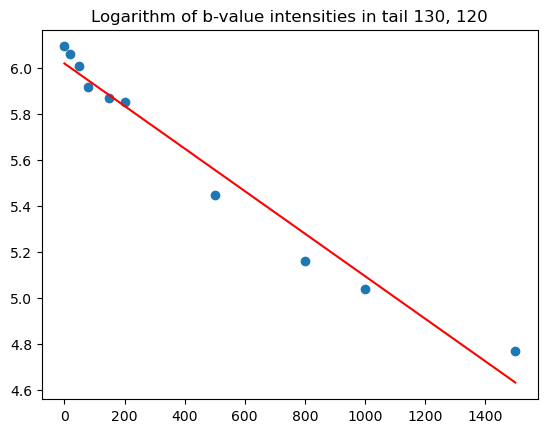

-------------------


In [7]:
tmp = "刘伯林"
tmp_a = n_analysis[tmp]

# plot
tmp_a.plot_mask_roi()
plt.show()
print("-------------------")

# plot
_, ax = plt.subplots()
tmp_a.plot_pancreas_slice(ax)
plt.show()
print("-------------------")

# plot
_, ax = plt.subplots()
tmp_a.plot_pancreas_slice(ax, plot_roi=True)
plt.show()
print("-------------------")

# plot
tmp_a.plot_log_b()
plt.show()
print("-------------------")

### plot each patient with roi

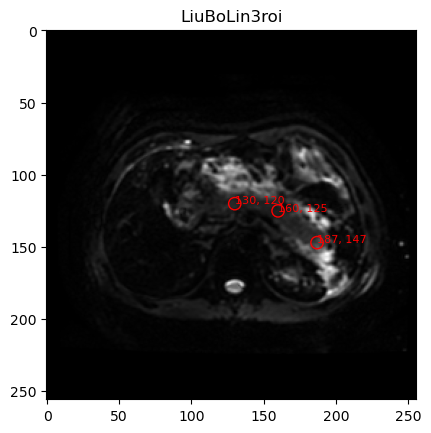

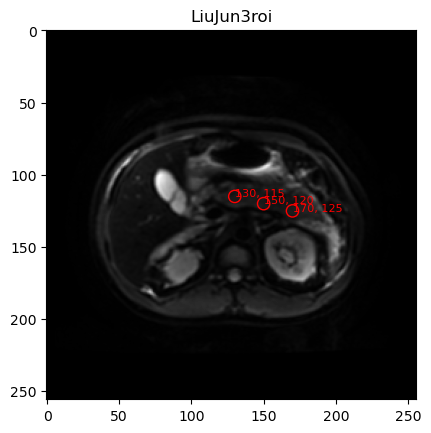

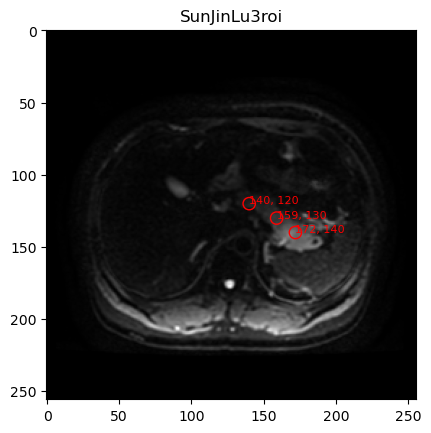

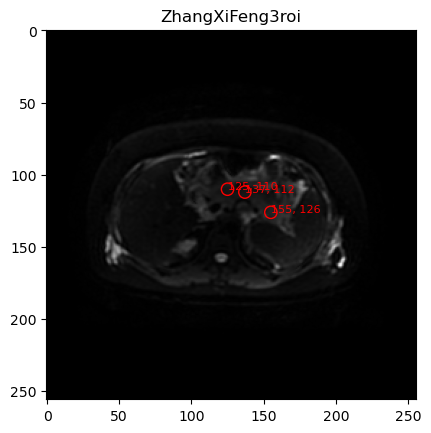

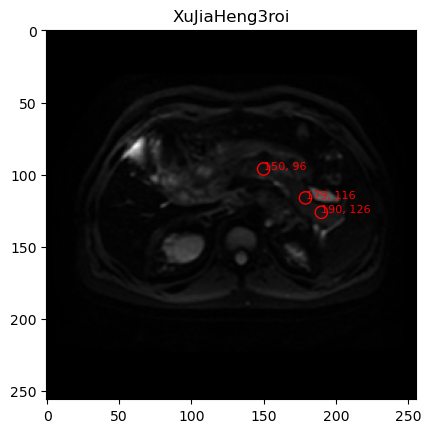

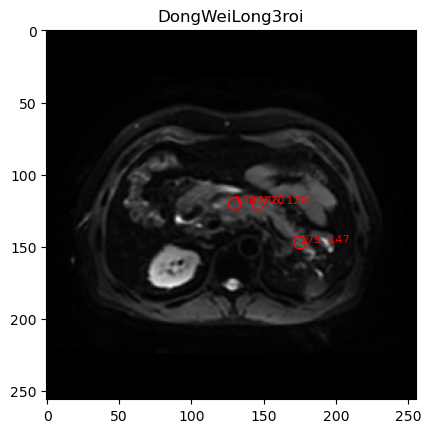

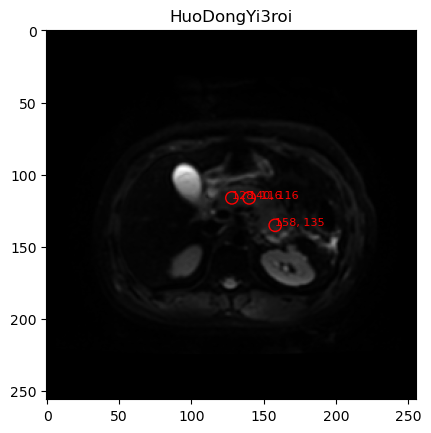

In [8]:
import matplotlib.pyplot as plt
for circles, analysis in n_analysis.items():
    _, ax = plt.subplots()
    analysis.plot_pancreas_slice(ax, plot_roi=True)
    ax.set_title(analysis.patient_name_pinyin + '3roi')

    
    image_path = os.path.join(output_dir, analysis.patient_name_pinyin)
    image_path = os.path.join(image_path, "pancreas_slice_with_3roi.png")
    os.makedirs(os.path.dirname(image_path), exist_ok=True)
    plt.savefig(image_path)

### save log_b

In [9]:
list_roi_name = {"tail":0, "body":1, "head":2}

for name, analysis in n_analysis.items():
    image_path = os.path.join(output_dir, analysis.patient_name_pinyin)
    os.makedirs(image_path, exist_ok=True)

    # analysis.plot_b_intensities()
    # image_path = os.path.join(image_path, "ivim_params.png")
    # plt.savefig("../output/b_intensities.png")
    # plt.show()
    # TODO: multiple roi
    for key, roi in list_roi_name.items():
        analysis.plot_log_b(roi)
        log_b_png = os.path.join(image_path, f"log_b_{key}.png")
        plt.savefig(log_b_png)
        plt.close()

10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00092286] 6.017820247185039
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00090199] 5.931173173188425
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00104704] 6.638594744561641
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00102443] 5.79819587222106
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00118853] 5.843261922634334
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00109437] 5.936359748758639
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00092901] 4.713620601912755
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00104127] 5.349113271340022
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00104477] 6.055149879556661
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00117171] 5.538868850706972
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00109375] 5.424150268414485
10
[   0   20 

# Run analysis

In [10]:
for i, analysis in n_analysis.items():
    pickle_ivim_path = os.path.join(pickle_ivim_output_path, 'ivim_maps'+analysis.patient_id+'.pkl')
    analysis.run_analysis(load_from_pickle=True, 
                          pickle_ivim_path=pickle_ivim_path,
                          save_ivim_params=True,
                          is_plot=False)

Running analysis for LiuBoLin, saving to ../output/static/pickled/ivim/ivim_maps刘伯林.pkl
Loading LiuBoLin data from pickle file
LiuBoLin Data loaded successfully
IVIM parameters not saved
Running analysis for LiuJun, saving to ../output/static/pickled/ivim/ivim_maps刘军.pkl
Loading LiuJun data from pickle file
LiuJun Data loaded successfully
IVIM parameters not saved
Running analysis for SunJinLu, saving to ../output/static/pickled/ivim/ivim_maps孙金鹿.pkl
Loading SunJinLu data from pickle file
SunJinLu Data loaded successfully
IVIM parameters not saved
Running analysis for ZhangXiFeng, saving to ../output/static/pickled/ivim/ivim_maps张喜凤.pkl
Loading ZhangXiFeng data from pickle file
ZhangXiFeng Data loaded successfully
IVIM parameters not saved
Running analysis for XuJiaHeng, saving to ../output/static/pickled/ivim/ivim_maps徐家恒.pkl
Loading XuJiaHeng data from pickle file
XuJiaHeng Data loaded successfully
IVIM parameters not saved
Running analysis for DongWeiLong, saving to ../output/static

## Plot the IVIM parameters

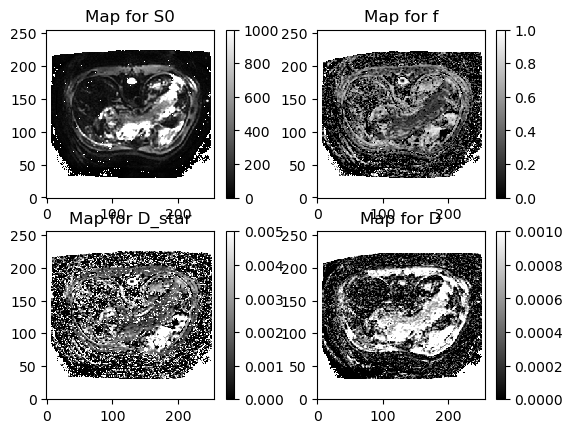

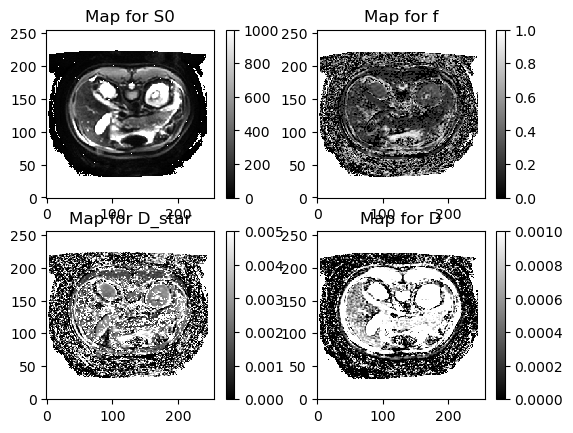

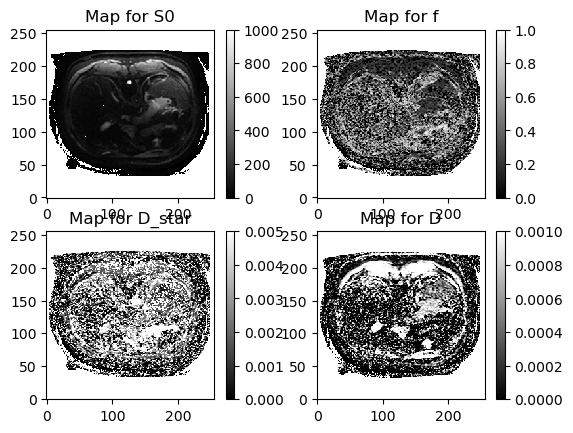

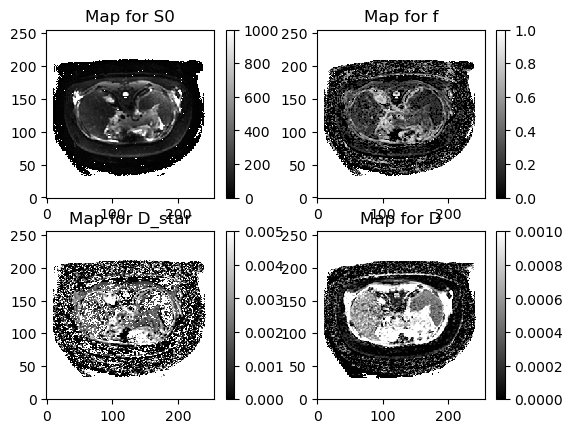

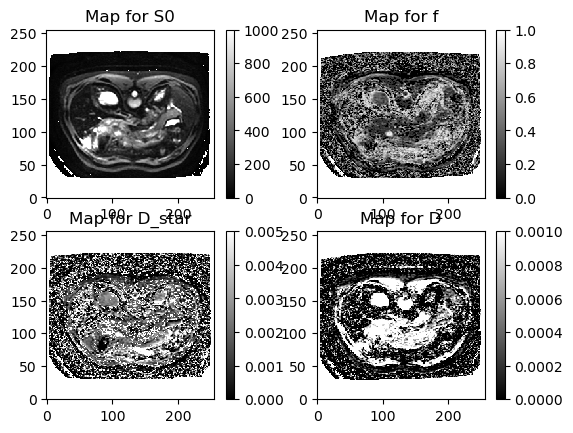

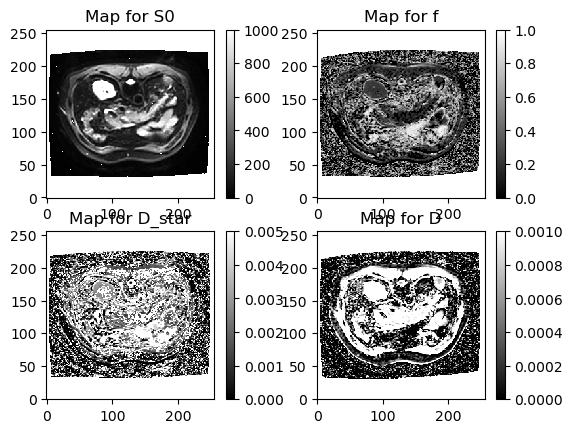

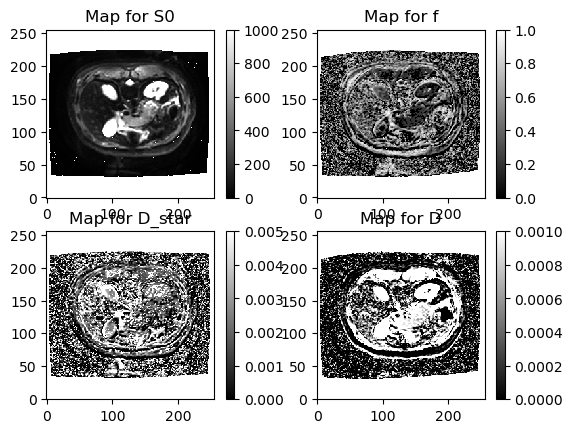

In [11]:
list_fig_ivim = {}
for name, analysis in n_analysis.items():
    list_fig_ivim[analysis.patient_name_pinyin] = analysis.plot_ivim()

# Save fig and pptx

In [12]:
import os
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# 保存图片
for i, fig in list_fig_ivim.items():
    image_path = os.path.join(output_dir, i)
    os.makedirs(image_path, exist_ok=True)
    image_path = os.path.join(image_path, "ivim_params.png")
    fig.savefig(image_path)


In [13]:
def add_pic_to_slice(prs, image_path, text=""):
    # 添加幻灯片
    slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
    slide = prs.slides.add_slide(slide_layout)

    # 添加图片到幻灯片
    left = Inches(1)
    top = Inches(1)
    height = Inches(5.5)
    # add text to slide
    slide.shapes.placeholders[0].text = text
    slide.shapes.add_picture(image_path, left, top, height=height)

# 创建 PowerPoint 演示文稿
def generate_pptx():
    prs = Presentation()

    add_pic_to_slice(prs, all_pan_with_roi, text="T2 and ADC")

    for i, _ in list_fig_ivim.items():
        base_output_dir = os.path.join(output_dir, i)
        image_path = os.path.join(base_output_dir, "ivim_params.png")
        add_pic_to_slice(prs, image_path, text=i)

        # use func
        for key in list_roi_name:
            log_b_png = os.path.join(base_output_dir, f"log_b_{key}.png")
            add_pic_to_slice(prs, log_b_png, text=i)
            
        pancreas_slice_path = os.path.join(base_output_dir, "pancreas_slice_with_3roi.png")
        add_pic_to_slice(prs, pancreas_slice_path, text=i)

    # 保存 PowerPoint 文件
    pptx_path = os.path.join(output_dir, "presentation.pptx")
    prs.save(pptx_path)

    print(f"PowerPoint 文件已保存到: {pptx_path}")

generate_pptx()


PowerPoint 文件已保存到: ../output/static/presentation.pptx


# Print para

In [14]:
for name, analysis in n_analysis.items():
    analysis.print_estimated_params_roi(save_ivim_params=True, output_path=f"{output_dir}/{analysis.patient_name_pinyin}")

刘伯林 estimated parameter:
tail:
S0: 434.3534435682526
f: 0.28187972311039083
D_star: 0.016186115158424275
D: 0.0006696656405502122
body:
S0: 395.1724324056253
f: 0.21331287154974804
D_star: 0.0569183165579978
D: 0.0007445185695702888
head:
S0: 807.9889869568209
f: 0.2418283943083821
D_star: 0.018679741254476318
D: 0.0008529382469108005
刘军 estimated parameter:
tail:
S0: 340.15872515117405
f: 0.12198421689052108
D_star: 0.026878703005593186
D: 0.0009304101745018773
body:
S0: 374.0930411636046
f: 0.10518924280243731
D_star: 0.25904383098622646
D: 0.0011526247786174048
head:
S0: 412.8338509353683
f: 0.07908150039926791
D_star: 0.28730170366986085
D: 0.0010926569474993533
孙金鹿 estimated parameter:
tail:
S0: 130.62100283637398
f: 0.3185291032103311
D_star: 0.044226225689732945
D: 0.0005450480674479143
body:
S0: 245.01073677173886
f: 0.233170890616822
D_star: 0.09641521582213583
D: 0.0008821921338449916
head:
S0: 468.3127384942248
f: 0.21115439152517548
D_star: 0.1172411105789329
D: 0.000856866

11


<Figure size 640x480 with 0 Axes>

11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00110583] 6.375384321340785


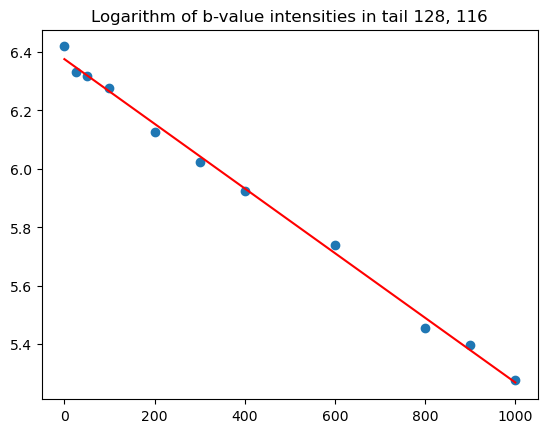

In [15]:
analysis.plot_b_intensities()
plt.savefig("../output/b_intensities.png")
plt.show()
analysis.plot_log_b()
plt.savefig("../output/log_b.png")